# Ejercicio 5 - Aprendizaje Supervizado Clasificacion Parte II
## Inteligencia Artificial - Ing. en Sistemas de Información 
## UTN Facultad Regional Villa Maria
### Natalia Bruno - Legajo: 10683

1. Utilizar, al igual que en los anteriores prácticos, una semilla de random_state igual al número de orden en Entregas TPs.

2. Elegir dos clasificadores y realizar alguna predicción en un dataset a su elección tal como lo venimos haciendo hasta ahora, mostrando para cada clasificador la tasa de aciertos junto con sus respectivos precision y recall (ayuda: utilizar *classification\_report* de _sklearn.metrics_ para no tener que calcular ambos a mano). Se alienta a que busquen nuevos datasets y cómo implementar clasificadores, por lo que al menos uno de los clasificadores seleccionados debe haber sido uno de los vistos en esta clase o algún otro no visto anteriormente.

3. Explicar el paso a paso de la implementación, y de la comparación de sus errores. Explicar por qué creen que un clasificador se desempeñó mejor o similarmente que el otro.

Fecha de entrega: **17/05/2017**.

**Punto 1:** Se declara una variable random_state con mi numero de alumno.

In [1]:
import numpy as np
rns = 2

**Punto 2:** 

## Carga datos de entrada 

Se seleccionó el dataset "Glass Classification" (https://www.kaggle.com/uciml/glass) Se trata de un conjunto de datos de identificación de vidrio de UCI. Contiene 10 atributos incluyendo el id. La respuesta es el tipo de vidrio (valores discretos 7)

In [2]:
import pandas as pd

#Cargamos el dataset mediante Pandas
data = pd.read_csv('glass.csv')

#Divido el dataset en features y target
y = data['Type']
x = data[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]


### Primero una vista general de los datos:

In [3]:
x.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11


El dataset consiste en un conjunto de 214 observaciones. PAra cada observacion se cuenta con la siguiente información:

    1. Id number: 1 to 214 (removed from CSV file)
    2. RI: refractive index
    3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    4. Mg: Magnesium
    5. Al: Aluminum
    6. Si: Silicon
    7. K: Potassium
    8. Ca: Calcium
    9. Ba: Barium
    10. Fe: Iron
    11. Type of glass: (class attribute) 
        1. building_windows_float_processed 
        2 building_windows_non_float_processed 
        3 vehicle_windows_float_processed 
        4 vehicle_windows_non_float_processed (ninguno en este database) 
        5 containers 
        6 tableware 
        7 headlamps
        
 En resumen, podemos obtener valores maximos, minimos, medias y rangos en cada uno de los atributos.

In [4]:
x.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


### Valores faltantes

In [5]:
print(data.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


Es importante mencionar los valores faltantes porque indican cuánto NO sabemos acerca de nuestros datos. Hacer inferencias basadas en sólo unos cuantos casos es a menudo imprudente. Además, muchos procedimientos de modelado se rompen cuando faltan valores y las filas correspondientes deben ser eliminadas completamente o los valores deben ser estimados de alguna manera.

Aca podemos ver que en el dataset elegido no hay valores faltantes.

### Distribucion de los Tipos

In [6]:
data_counts = data['Type'].value_counts()
data_counts

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Tambien mostramos de manera gráfica la distribucion para cada tipo de vidrio:

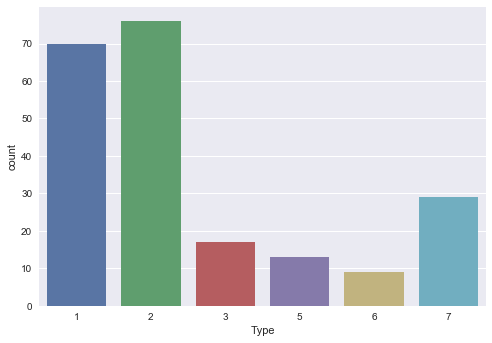

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data['Type'])
plt.show()

### Normalizacion de los datos:

En virtud de que todos los features contribuyan de forma equitativa, para algunos modelos se requiere que los datos estén normalizados de alguna forma, por ejemplo para que todos los valores caigan en el mismo rango ﬁjo. La normalización se hace en cada feature.
 
En este caso, es necesario normalizar los datos, ya que cada una de los atributos de nuestro DataaSet están definidos entre rangos de valores muy distintos. Podemos observar, por ejemplo, que Si se mueve en un rango de entre 69.81 y 75.41, mientras que Fe entre 0.00 y 0.51.

In [8]:
from sklearn.preprocessing import scale
#scale() estandariza los datos con respecto a la media 0 y a la desv. estándar 1
X_norm = scale(x)

### Implementación de clasificadores

In [9]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

**Aplicacion Clasificador SVM**

In [10]:
from sklearn import svm
from sklearn.svm import SVC

clf_svm = SVC(random_state=rns)

# Divido el conjunto en train, test
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25,  random_state=rns)

# Entreno el modelo con el sub-conjunto de datos de entrenamiento
clf_svm.fit(X_train, y_train)
y_hat_svm = clf_svm.predict(X_test)

# Muestro el porcentaje de aciertos del clasificador
score_svm = clf_svm.score(X_test,y_test)

print(score_svm)
print("Mean score = %.3f, Std deviation = %.3f"%(np.mean(score_svm),np.std(score_svm)))

0.62962962963
Mean score = 0.630, Std deviation = 0.000


In [11]:
confusion_matrix = metrics.confusion_matrix(y_test, y_hat_svm)
print(confusion_matrix)

[[14  8  0  0  0  0]
 [ 2 13  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  1  0  0  1  0]
 [ 1  2  0  0  0  6]]


In [16]:
print(metrics.classification_report(y_test,y_hat_svm))

             precision    recall  f1-score   support

          1       0.74      0.64      0.68        22
          2       0.46      0.87      0.60        15
          3       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         3
          6       1.00      0.50      0.67         2
          7       1.00      0.67      0.80         9

avg / total       0.63      0.63      0.60        54



c:\program files (x86)\python36-32\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Aplicacion Clasificador Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10, class_weight="balanced", \
                                min_weight_fraction_leaf=0.02)

# Divido el conjunto en train, test
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25,  random_state=rns)

# Entreno el modelo con el sub-conjunto de datos de entrenamiento
clf_rf = clf_rf.fit(X_train,y_train)
y_hat_rf = clf_rf.predict(X_test)

# Muestro el porcentaje de aciertos del clasificador
score_rf = clf_rf.score(X_test,y_test)
print(score_rf)
print("Mean score = %.3f, Std deviation = %.3f"%(np.mean(score_rf),np.std(score_rf)))

0.759259259259
Mean score = 0.759, Std deviation = 0.000


In [14]:
confusion_matrix = metrics.confusion_matrix(y_test, y_hat_rf)
print(confusion_matrix)

[[17  4  1  0  0  0]
 [ 1 11  0  3  0  0]
 [ 2  0  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 1  0  0  1  0  7]]


In [15]:
print(metrics.classification_report(y_test,y_hat_rf))

             precision    recall  f1-score   support

          1       0.81      0.77      0.79        22
          2       0.73      0.73      0.73        15
          3       0.50      0.33      0.40         3
          5       0.43      1.00      0.60         3
          6       1.00      1.00      1.00         2
          7       1.00      0.78      0.88         9

avg / total       0.79      0.76      0.76        54



Como se puede ver la tasa de aciertos que obtiene cada clasificador es similar, SVC con un score de 0.63 y RandomForest con 0.75. El desempeño de un determinado clasificador depende del dataset que estemos utilizando, la cantidad de clases y de muestras disponibles.

En términos prácticos ambos tienen sus ventajas y desventajas. El SVC puede ser mas óptimo para aplicar en clasificadores multicategoría mientras que el RandomForest se prefiere en clasificaciones binarias. En este caso en particular, el score obtenido con SVC es menor, esto puede darse porque el numero de muestras no es suficientes dado que es un dataset relativamente pequeño.

Se podrian obtener scores mas elevados si analizamos los features con mayor detalle y reducimos los mismos a los que resulten útiles para realizar la clasificación y capaz otro algoritmo es mas eficiente.